In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
base_dir = './img'
categories = ['bakso', 'gado', 'gudeg', 'rendang', 'sate']

In [3]:
image_dir = './processed_images/'
train_dir = os.path.join(image_dir, 'train')
test_dir = os.path.join(image_dir, 'test')

In [4]:
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

In [5]:
for category in categories:
    category_dir = os.path.join(base_dir, category)
    images = os.listdir(category_dir)
    
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=123)
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(test_dir, category)
    
    for image in train_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(train_category_dir, image)
        shutil.copy(src, dst)
        
    for image in val_images:
        src = os.path.join(category_dir, image)
        dst = os.path.join(val_category_dir, image)
        shutil.copy(src, dst)

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (80, 120),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (80, 120),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 5818 images belonging to 5 classes.
Found 1456 images belonging to 5 classes.


In [8]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(80, 120, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11632\3564209808.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [9]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 3, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,916,421 (11.13 MB)

 Trainable params: 658,437 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [12]:
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'model-pretrained.keras',
    verbose = 1,
    save_best_only = True,
    monitor = 'val_loss',
    mode = 'min'
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch = 50,
    epochs = 40,
    validation_data = val_generator,
    validation_steps = 25,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/40

Epoch 1: val_loss did not improve from 0.30293
50/50 - 10s - 193ms/step - accuracy: 0.8750 - loss: 0.3386 - val_accuracy: 0.8838 - val_loss: 0.3796
Epoch 2/40

Epoch 2: val_loss did not improve from 0.30293
50/50 - 9s - 184ms/step - accuracy: 0.8675 - loss: 0.3529 - val_accuracy: 0.8537 - val_loss: 0.3932
Epoch 3/40

Epoch 3: val_loss did not improve from 0.30293
50/50 - 9s - 182ms/step - accuracy: 0.8714 - loss: 0.3398 - val_accuracy: 0.8750 - val_loss: 0.3689
Epoch 4/40

Epoch 4: val_loss did not improve from 0.30293
50/50 - 6s - 126ms/step - accuracy: 0.8857 - loss: 0.2901 - val_accuracy: 0.8587 - val_loss: 0.3802
Epoch 5/40

Epoch 5: val_loss did not improve from 0.30293
50/50 - 9s - 187ms/step - accuracy: 0.8906 - loss: 0.2994 - val_accuracy: 0.8913 - val_loss: 0.3221
Epoch 6/40

Epoch 6: val_loss did not improve from 0.30293
50/50 - 9s - 185ms/step - accuracy: 0.8781 - loss: 0.3376 - val_accuracy: 0.8850 - val_loss: 0.3198
Epoch 7/40

Epoch 7: val_loss did not improve

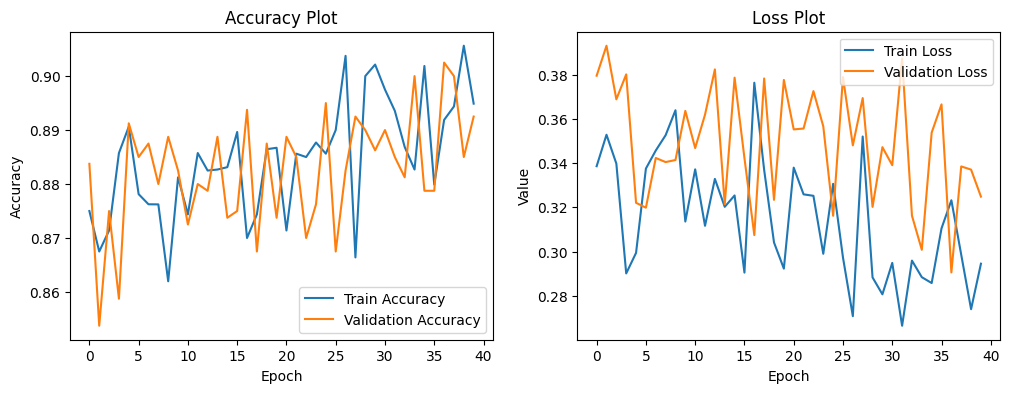

In [18]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

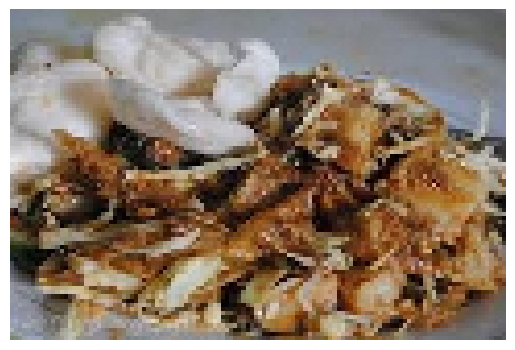

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediksi: gado


In [19]:
img_path = r"D:\USU\Semester 5\Kecerdasan Buatan\Final Project\model-cnn\processed_images\test\gado\gado gado-20019.jpg"
img = load_img(img_path, target_size=(80, 120))

plt.imshow(img)
plt.axis('off')
plt.show()

x = img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

classes = model.predict(x)
output = np.argmax(classes)

print(f"Prediksi: {categories[output]}")